# Data Analytics and Big Data

## 5. Ciencia de Datos con Python

### Task 4. Proyecto Final

#### 1. Introducción del proyecto

Para éste proyecto se utiliza el lenguaje de programación Python y algunas bibliotecas relacionadas al análisis de datos y aprendizaje automático con el fin de explorar datos y crear modelos, y para profundizar en la aplicación de algoritmos de aprendizaje automático. Además, se busca seleccionar el modelo que mejor se adapte a los datos comparando sus características de rendimiento y ajustando parámetros con el fin de optimizar los resultados.

En el proyecto se demuestra el conocimiento y habilidad en lo siguiente:

   - GitHub.
   - Python y bibliotecas necesarias para resolver el problema.
   - Análisis Exploratorio de Datos.
   - Data Collection, pre-procesamiento y feature engineering.
   - Visualización de datos.
   - Proceso de ciencia de datos: mejores prácticas.
   - Modelado predictivo y evaluación (todo el proceso).
   - Selección del modelo.
   - Validación cruzada.
    
#### 2. Datos a utilizar

Los datos seleccionados para el proyecto utilizan factores relacionados con el reingreso y otros datos de pacientes que padecen de diabetes. El conjunto de datos representa 10 años (1999 - 2008) de atención clínica en 130 hospitales y redes de entrega integradas de Estados Unidos. Incluye más de 50 características que representan los resultados del paciente y del hospital. El conjunto contiene información de la base de datos para encuentros que satisfacían los siguientes criterios:

   1. Es un encuentro hospitalario (ingreso hospitalario).
   2. Es un encuentro diabético; es decir, se ingresó al sistema cualquier tipo de diabetes como diagnóstico.
   3. La duración de la estadía fue de al menos 1 día y como máximo 14 días.
   4. Se efectuaron pruebas de laboratorio durante el encuentro.
   5. Se administraron medicamentos durante el encuentro.

Tomando en cuenta lo anterior, los datos contienen atributos como el número de paciente, raza, sexo, edad, tipo de admisión, tiempo en el hospital, especialidad médica del médico de admisión, número de pruebas de laboratorio realizadas, resultados de la prueba HbA1c, diagnóstico, número de medicamentos, medicamentos para la diabetes, visitas de emergencia en el año anterior a la hospitalización, número de visitas ambulatorias, número de hospitalizaciones, entre otros.

Según la OMS, para el año 2014 existían alrededor de 422 millones de personas con algún tipo de diabetes. Con el conjunto de datos actual se puede predecir si un paciente será o no readmitido en el hospital, con el fin de modifical el tratamiento y así evitar el reingreso del mismo. Por lo tanto, el conjunto de datos nos muestra 3 tipos de salida distintos:

   - Sin reingreso.
   - Reingreso en menos de 30 días. Ésta situación no es buena, porque puede indicar que el tratamiento no era el indicado.
   - Reingreso en más de 30 días. Ésta situación puede deberse al estado del paciente.
   
Los datos se presentan en nombre del Centro de Investigación Clínica y Traslacional, Virginia Commonwealth University, un receptor de NIH CTSA Grant UL1 TR00058 y un receptor de los datos CERNER. John Clore (jclore '@' vcu.edu), Krzysztof J. Cios (kcios '@' vcu.edu), Jon DeShazo (jpdeshazo '@' vcu.edu) y Beata Strack (strackb '@' vcu.edu) . Estos datos son un resumen desidentificado de la base de datos de Datos de salud (Cerner Corporation, Kansas City, MO).

*Fuente*: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

##### Objetivo

Para el proyecto se realizará un enfoque en **determinar la influencia, de distintos atributos, en si el paciente será o no reingresado en el hospital**. Además, con el conjunto de datos disponibles, se construyen 3 modelos que utilicen distintos algoritmos, se comparan y se selecciona el modelo con mejor rendimiento, por medio del cual se logre **predecir la readmisión o no del paciente**.

##### Hipótesis

A continuación, se mencionan las hipótesis planteadas:

  - Entre mayor edad tenga el paciente es más probable que reingrese nuevamente al hospital.
  - Entre más tiempo permaneció internado el paciente en el hospital la última vez, es menos probable que reingrese por un problema similar.
  - La probabilidad de que el paciente no sea ingresado al hospital es mayor si éste presenta una prescripción de medicamentos para la diabetes.
  - El cambio de medicación disminuye la probabilidad de que el paciente no reingrese al hospital.
  
  
#### Librerías

Inicialmente, se importan los modulos necesarios para la realización del proyecto

In [1]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

# estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# model metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score

# cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#### 3. Análisis Exploratorio de Datos

En ésta sección se realiza la exploracipon inicial de los datos, con el fin de analizar atributos que puedan influir en el reingreso o no del paciente con diabetes. Primeramente, se importan y se observar los datos; después se continúa con la limpieza y preparación de estos y; finalmente, se observan visualizaciones de los datos.

##### Importar y preparar los datos

El primer paso, indiferentemente de la herramienta en uso, es importar los datos con los que se realizará el proyecto y luego procesarlos. En éste caso, se procede a importar el archivo "diabetic_data.csv", el cual consta de más de 100 000 observaciones con 50 atributos. 

Se lee el archivo que contiene los datos por medio de la función read_csv como se muestra a continuación

In [2]:
diabeticDF = pd.read_csv('diabetic_data.csv', header = 0)

En éste caso, se nombró el dataframe como "diabeticDF". A continuación, se procede a dar un vistazo rápido a los datos disponibles por medio de la función *head()*

In [3]:
diabeticDF.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Seguidamente, se utiliza la función *describe()* con el fin de comprende la composición de los datos

In [4]:
diabeticDF.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Con el fin de conocer el tipo de dato de cada una de las variables del dataframe, se utiliza la función *info()* de la biblioteca de Pandas de la siguiente manera:

In [5]:
diabeticDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Ahora que se le dió un vistazo general a los datos, se procede a realizar el preprocesamiento de los mismos. Esto con el fin de darle un vistazo más profundo enfocándose en el problema.

##### Limpieza y preparación de los datos

Para comenzar con la limpieza de datos, se decide observar si existen valores faltantes en el conjunto de datos. Con el vistazo general anterior, se puede observar que algunos atributos presentan valores nulos utilizando el símbolo de interrogación "?". Por lo tanto, se procede a cambiar dicho valor a "NaN"

In [6]:
diabeticDF.replace('?', np.nan, inplace = True)
diabeticDF

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Con el fin de determinar la cantidad de valores nulos en cada columna, se crea un nuevo conjunto que muestre la cantidad de valores nulos

In [7]:
diabeticDF_null = pd.DataFrame({'Attribute': diabeticDF.columns, 'Null': diabeticDF.isnull().sum(), 'Null_percentage': diabeticDF.isnull().sum()/len(diabeticDF)*100})
diabeticDF_null.sort_values('Null', ascending = False)

,Attribute,Null,Null_percentage
weight,weight,98569,96.858479
medical_specialty,medical_specialty,49949,49.082208
payer_code,payer_code,40256,39.557416
race,race,2273,2.233555
diag_3,diag_3,1423,1.398306
diag_2,diag_2,358,0.351787
diag_1,diag_1,21,0.020636
encounter_id,encounter_id,0,0.000000
tolazamide,tolazamide,0,0.000000
glyburide,glyburide,0,0.000000


Los atributos de *weight*, *medical_specialty* y *payer_code* presentan un porcentaje muy alto de valores nulos (mayor al 35% de los datos), por lo tanto, se decide remover éstas columnas

In [8]:
diabeticDF.drop(['weight','medical_specialty','payer_code'], axis = 'columns', inplace = True)

Seguidamente, se eliminan las observaciones que contengan valores nulos, como los mostrados en los atributos de *race*, *diag_3*, *diag_2* y *diag_1*.

In [9]:
diabeticDF.dropna(inplace = True)

Además, se dispone de distintos atributos de IDs:

   - encounter_id. Identificador único de un encuentro.
   - patient_nbr. Identificador único de un paciente.
   - admission_type_id. Identificador correspondiente a 8 valores distintos, por ejemplo, *emergency*, *urgent*, *elective*, *newborn*, etc.
   - discharge_disposition_id. Identificador correspondiente a 29 valores distintos, por ejemplo, *discharged to home*, *expired*, etc.
   - admission_source_id. Identificador correspondiente a 26 valores distintos, por ejemplo, *physician referral*, *emergency room*, *transfer from a hospital*, etc.
   
Los primeros dos atributos no proporcionan ninguna información relevante en el análisis o en el futuro modelo ya que presentan valores únicos, por lo tanto se eliminan ambas columnas.

In [10]:
diabeticDF.drop(['encounter_id', 'patient_nbr'], axis = 'columns', inplace = True)

Con respecto a los otros tres atributos, estos presentan valores que no muestran información, por ejemplo:

   - admission_type_id. 5: Not Available, 6: NULL, 7: Not Mapped.
   - discharge_disposition_id. 18: NULL, 25: Not Mapped, 26: Unknown/Invalid.
   - admission_source_id. 9: Not Available, 17: NULL, 20: Not Mapped, 21: Unknown/Invalid.
   
Se procede a observar la cantidad de observaciones que presentan dichos valores (en los casos donde existen al menos un valor).

In [11]:
print("admission_type_id")
print("\tNot Available:", end =" ")
print(diabeticDF['admission_type_id'].value_counts()[5])
print("\tNULL:", end =" ")
print(diabeticDF['admission_type_id'].value_counts()[6])
print("\tNot Mapped:", end =" ")
print(diabeticDF['admission_type_id'].value_counts()[7])
print("discharge_disposition_id")
print("\tNULL:", end =" ")
print(diabeticDF['discharge_disposition_id'].value_counts()[18])
print("\tNot Mapped:", end =" ")
print(diabeticDF['discharge_disposition_id'].value_counts()[25])
print("admission_source_id")
print("\tNot Available:", end =" ")
print(diabeticDF['admission_source_id'].value_counts()[9])
print("\tNULL:", end =" ")
print(diabeticDF['admission_source_id'].value_counts()[17])
print("\tNot Mapped:", end =" ")
print(diabeticDF['admission_source_id'].value_counts()[20])

admission_type_id
	Not Available: 4661
	NULL: 5135
	Not Mapped: 20
discharge_disposition_id
	NULL: 3624
	Not Mapped: 941
admission_source_id
	Not Available: 49
	NULL: 6602
	Not Mapped: 160


Existen al menos 4500 observaciones con valores que no ofrecen información, por lo que se decide eliminar dichas columnas.

In [12]:
diabeticDF.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis = 'columns', inplace = True)
diabeticDF.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,Steady,No,No,No,No,No,No,Yes,>30


Se observan la cantidad de valores en las variables de tipo *object*, con el fin de determinar si existen valores que no aplican en nuestro conjunto de datos

In [13]:
diabeticDF.describe(include=['object'])

,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,98053,98053,98053,98053,98053,98053,98053,98053,98053,98053,...,98053,98053,98053,98053,98053,98053,98053,98053,98053,98053
unique,5,3,10,713,740,786,4,4,4,4,...,1,4,4,2,2,1,2,2,2,3
top,Caucasian,Female,[70-80),428,428,250,None,None,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
freq,75079,52833,25306,6730,6517,11208,92845,81860,78808,96530,...,98053,45943,97384,98040,98052,98053,98052,52774,75351,52338


Se logra observar que el género presenta 3 valores únicos, los cuales se muestran a continuación

In [14]:
diabeticDF['gender'].value_counts()

Female             52833
Male               45219
Unknown/Invalid        1
Name: gender, dtype: int64

Se procede a eliminar la observación con la categoría "Unknown/Invalid"

In [15]:
diabeticDF = diabeticDF[diabeticDF.gender != 'Unknown/Invalid']

Además, se observa que los atributos de *Diagnosis* están categorizados en códigos, con el fin de disminuir la cantidad de categorías posibles en estos atributos se hace uso de la tabla 2 del paper *Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records* (fuente: https://www.hindawi.com/journals/bmri/2014/781670/), donde se muestra el rango de códigos para distintos grupos.

Para llevar esto a cabo se desarrolla una función, donde se establecen los rangos para cada categoría:

In [16]:
def diagnosis(x):
    if 390 <= x <= 459 or x == 785:
        return "Circulatory"
    if 460 <= x <= 519 or x == 786:
        return "Respiratory"
    if 520 <= x <= 579 or x == 787:
        return "Digestive"
    if 250 <= x < 251:
        return "Diabetes"
    if 800 <= x <= 999:
        return "Injury"
    if 710 <= x <= 739:
        return "Musculoskeletal"
    if 580 <= x <= 629 or x == 788:
        return "Genitourinary"
    if 140 <= x <= 239:
        return "Neoplams"
    return "Other"

Se copian las columnas de *Diagnosis* en un nuevo data frame con el fin de implementar dichos cambios

In [17]:
diagnosisDF = diabeticDF.iloc[:,10:13]
diagnosisDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   diag_1  98052 non-null  object
 1   diag_2  98052 non-null  object
 2   diag_3  98052 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


Para aplicar la función creada anteriormente es necesario primero cambiar el tipo de variable a *float*, por lo que es necesario cambiar los códigos que comienzan con las letras "E" y "V", se decide convertirlos en valores negativos (ya que estos entran en la categoría *Other*, la cual toma en cuenta los valores negativos).

In [18]:
#Replace "E" and "V" for "-"
diagnosisDF['diag_1'] = diagnosisDF['diag_1'].str.replace('E','-')
diagnosisDF['diag_1'] = diagnosisDF['diag_1'].str.replace('V','-')
diagnosisDF['diag_2'] = diagnosisDF['diag_2'].str.replace('E','-')
diagnosisDF['diag_2'] = diagnosisDF['diag_2'].str.replace('V','-')
diagnosisDF['diag_3'] = diagnosisDF['diag_3'].str.replace('E','-')
diagnosisDF['diag_3'] = diagnosisDF['diag_3'].str.replace('V','-')

#Changing the type of the attributes to float
diagnosisDF['diag_1'] = diagnosisDF['diag_1'].astype(float)
diagnosisDF['diag_2'] = diagnosisDF['diag_2'].astype(float)
diagnosisDF['diag_3'] = diagnosisDF['diag_3'].astype(float)

diagnosisDF.info()
diagnosisDF.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   diag_1  98052 non-null  float64
 1   diag_2  98052 non-null  float64
 2   diag_3  98052 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB


,diag_1,diag_2,diag_3
1,276.0,250.01,255.0
2,648.0,250.00,-27.0
3,8.0,250.43,403.0
4,197.0,157.00,250.0
5,414.0,411.00,250.0


Se procede a aplicar la función para categorizar los códigos de *Diagnosis*

In [19]:
for col in diagnosisDF.columns:
    diagnosisDF[col] = diagnosisDF[col].apply(lambda x: diagnosis(x))

diagnosisDF.head()

,diag_1,diag_2,diag_3
1,Other,Diabetes,Other
2,Other,Diabetes,Other
3,Other,Diabetes,Circulatory
4,Neoplams,Neoplams,Diabetes
5,Circulatory,Circulatory,Diabetes


A continuación, se sustituyen los atributos en el data frame original

In [20]:
diabeticDF.loc[:, ('diag_1', 'diag_2', 'diag_3')] = diagnosisDF.loc[:, ('diag_1', 'diag_2', 'diag_3')]
diabeticDF.iloc[:, 9:14].head()

C:\Users\msfallas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
1,0,Other,Diabetes,Other,9
2,1,Other,Diabetes,Other,6
3,0,Other,Diabetes,Circulatory,7
4,0,Neoplams,Neoplams,Diabetes,5
5,0,Circulatory,Circulatory,Diabetes,9


Se decide establecer solamente 5 valores para la edad de los pacientes, por lo tanto las nuevas categorías abarcar las siguientes edades:

   - Child: [0,10[
   - Young Adults: [10,30[
   - Adults: [30,40[
   - Middle-Aged Adults: [40,70[
   - Older Adults: [70,100[

A continuación, se reemplazan los valores actuales a los mencionados anteriormente

In [21]:
diabeticDF['age'].value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [22]:
#Replacing "[" and ")"
diabeticDF.loc[:, ('age')] = diabeticDF.loc[:, ('age')].str.replace('\[','')
diabeticDF.loc[:, ('age')] = diabeticDF.loc[:, ('age')].str.replace('\)','')

C:\Users\msfallas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
#Dictionary with new values
age_dict = {'0-10':'Child',
           '10-20':'Young Adults',
           '20-30':'Young Adults',
           '30-40':'Adults',
           '40-50':'Middle-Aged Adults',
           '50-60':'Middle-Aged Adults',
           '60-70':'Middle-Aged Adults',
           '70-80':'Older Adults',
           '80-90':'Older Adults',
           '90-100':'Older Adults'}

#Replacing the values
diabeticDF.loc[:,('age')] = diabeticDF['age'].replace(age_dict, regex = False)

In [24]:
diabeticDF['age'].value_counts()

Middle-Aged Adults    47771
Older Adults          44724
Adults                 3548
Young Adults           1944
Child                    65
Name: age, dtype: int64

Finalmente, se limita la variable dependiente a solamente dos opciones, si el paciente fue readmitido o no. Por lo tanto, se procede a cambiar los valores de ">30" y "<30" a "YES"

In [25]:
diabeticDF.loc[:, ('readmitted')] = diabeticDF.loc[:, ('readmitted')].str.replace('<30','YES')
diabeticDF.loc[:, ('readmitted')] = diabeticDF.loc[:, ('readmitted')].str.replace('>30','YES')

Se procede a darle un vistazo a los datos y sus tipos de variable, con los cambios implementados hasta ahora

In [26]:
diabeticDF.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,Young Adults,3,59,0,18,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,YES
2,AfricanAmerican,Female,Young Adults,2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,Adults,2,44,1,16,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,Middle-Aged Adults,1,51,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,Middle-Aged Adults,3,31,6,16,0,0,0,...,No,Steady,No,No,No,No,No,No,Yes,YES


In [27]:
diabeticDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98052 non-null  object
 1   gender                    98052 non-null  object
 2   age                       98052 non-null  object
 3   time_in_hospital          98052 non-null  int64 
 4   num_lab_procedures        98052 non-null  int64 
 5   num_procedures            98052 non-null  int64 
 6   num_medications           98052 non-null  int64 
 7   number_outpatient         98052 non-null  int64 
 8   number_emergency          98052 non-null  int64 
 9   number_inpatient          98052 non-null  int64 
 10  diag_1                    98052 non-null  object
 11  diag_2                    98052 non-null  object
 12  diag_3                    98052 non-null  object
 13  number_diagnoses          98052 non-null  int64 
 14  max_glu_serum        

In [28]:
diabeticDF

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,Young Adults,3,59,0,18,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,YES
2,AfricanAmerican,Female,Young Adults,2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,Adults,2,44,1,16,0,0,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,Middle-Aged Adults,1,51,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,Middle-Aged Adults,3,31,6,16,0,0,0,...,No,Steady,No,No,No,No,No,No,Yes,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Older Adults,3,51,0,16,0,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,YES
101762,AfricanAmerican,Female,Older Adults,5,33,3,18,0,0,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,Older Adults,1,53,0,9,1,0,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,Older Adults,10,45,2,21,0,0,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Con la preparación de datos realizada, es posible continuar con la exploración de los mismo para obtener más información sobre el problema en cuestión y cómo utilizará la ciencia de datos para resolverlo o, al menos, comprenderlo mejor.

##### Visualización de los datos

Con el fin de profundizar más en los datos, se procede a realizar visualizaciones que nos permitan conocer relaciones entre variables. La primer visiualización consiste en un gráfico que nos permite conocer el porcentaje de personas que son readmitas y que no son readmitidas en el hospital.

In [29]:
plt.rcParams["figure.figsize"] = (12,8)

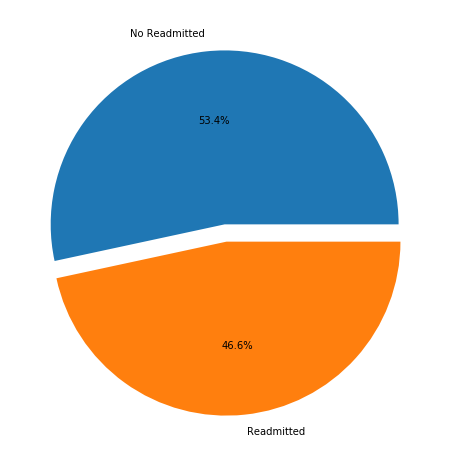

In [30]:
plt.pie(diabeticDF['readmitted'].value_counts(dropna=False),labels = ['No Readmitted','Readmitted'], autopct = '%1.1f%%', explode = (0,0.1))
plt.show()

Del gráfico anterior, se observa que un porcentaje muy alto de pacientes son readmitidos en el hospital después de ser dados de alta (46.6%), lo que demuestra que existe un problema en el tratamiento dado al paciente que podría provocar una recaída.

Seguidamente, con el fin de visualizar y analizar si existe alguna variable que nos defina con claridad por qué los pacientes vuelven a estar hospitalizados, se procede a realizar distintos gráficos separando la población entre los pacientes que son reingresados en el hospital y los que no.

Con el fin de separar los datos en ambos grupos, se procede a crear dos nuevos subconjuntos como se muestra a continuación

In [31]:
diabeticDF_readmitted = diabeticDF[diabeticDF['readmitted'] == 'YES']
diabeticDF_noReadmitted = diabeticDF[diabeticDF['readmitted'] == 'NO']

Verificando ambos conjuntos

In [32]:
diabeticDF_readmitted['readmitted'].describe()

count     45715
unique        1
top         YES
freq      45715
Name: readmitted, dtype: object

In [33]:
diabeticDF_noReadmitted['readmitted'].describe()

count     52337
unique        1
top          NO
freq      52337
Name: readmitted, dtype: object

Ahora que se dispone de los dos subconjuntos, se procede a construir distintas visualiaciones con el fin de determinar la relación existente entre variables.

Primeramente, se analiza si la edad de los pacientes tiene influencia en su reingreso en el hospital después de estar hospitalizado. Esto por medio de un gráfico de barras que muestre la distribución de los pacientes dentro de cada rango de edad.

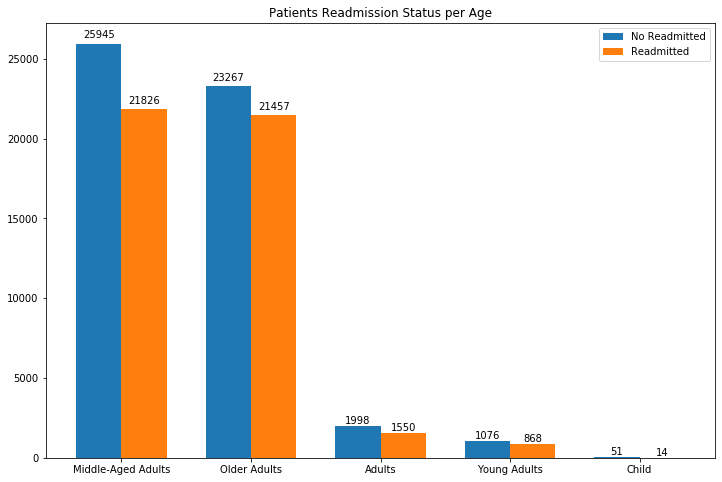

In [34]:
fig, ax = plt.subplots()

ind = np.arange(5)
width = 0.35  # the width of the bars
age_countNRA = diabeticDF_noReadmitted['age'].value_counts()
age_countRA = diabeticDF_readmitted['age'].value_counts()

age_plot1 = ax.bar(ind,age_countNRA, width, label = 'No Readmitted')
age_plot2 = ax.bar(ind+width,age_countRA, width, label = 'Readmitted')

ax.set_title('Patients Readmission Status per Age')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Middle-Aged Adults', 'Older Adults', 'Adults', 'Young Adults', 'Child'))

ax.legend()
ax.autoscale_view()

def autolabel(age_plot):
    for ageplot in age_plot:
        h = ageplot.get_height()
        ax.text(ageplot.get_x()+ageplot.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(age_plot1)
autolabel(age_plot2)

plt.show()

No se logra observar una clara relación con la edad ya que la diferencia en cada uno de los rangos es muy similar, a excepción de la categoría "Child"; sin embargo, en ésta última solamente se dispone de un total de 65 observaciones, lo cual es muy poco en comparación a las demás categorías. Por lo tanto, la hipótesis que menciona que *entre mayor edad tenga el paciente, éste es más probable que reingrese nuevamente al hospital* **se descarta**.

A continuación, se procede a observar si el tiempo en el hospital que pasa el paciente en la última vez que fue internado tiene relación con su futuro reingreso.

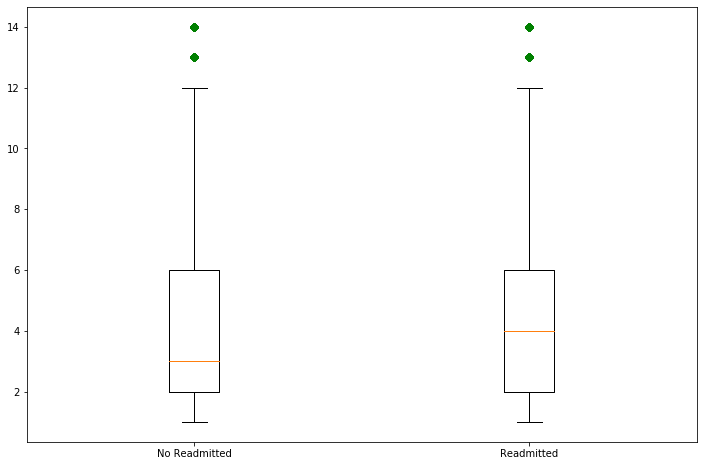

In [35]:
time_hospital = [diabeticDF_noReadmitted['time_in_hospital'], diabeticDF_readmitted['time_in_hospital']]

plt.boxplot(time_hospital,0,'gD',labels=['No Readmitted', 'Readmitted'])
plt.show()

En éste caso, no parece que la cantidad de tiempo que el paciente pasó internado la última vez tenga influencia en si será o no reingresado por un problema similar, ya que no se observa una clara tendencia. La única y muy pequeña diferencia es que, el 50% de los pacientes que no fueron reingresados permanecieron en el hospital por al menos 3 días la última vez que fueron internados, mientras que el 50% de los pacientes que fueron reingresados permanecieron como máximo 4 días. Por lo tanto, **se descarta** la hipótesis que menciona que *entre más tiempo permaneció internado el paciente en el hospital la última vez, es menos probable que reingrese por un problema similar*.

Seguidamente, se observa si existe alguna relación entre el estado de readmisión del paciente y si éste posee una prescripción de medicamentos para la diabetes.

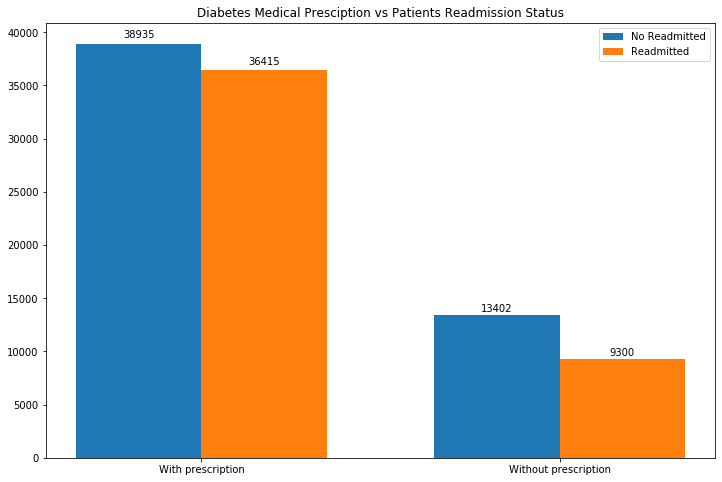

In [36]:
fig, ax = plt.subplots()

ind_med = np.arange(2)
width = 0.35  # the width of the bars
med_countNRA = diabeticDF_noReadmitted['diabetesMed'].value_counts()
med_countRA = diabeticDF_readmitted['diabetesMed'].value_counts()

med_plot1 = ax.bar(ind_med,med_countNRA, width, label = 'No Readmitted')
med_plot2 = ax.bar(ind_med+width,med_countRA, width, label = 'Readmitted')

ax.set_title('Diabetes Medical Presciption vs Patients Readmission Status')
ax.set_xticks(ind_med + width / 2)
ax.set_xticklabels(('With prescription', 'Without prescription'))

ax.legend()
ax.autoscale_view()

def autolabel2(med_plot):
    for medplot in med_plot:
        h = medplot.get_height()
        ax.text(medplot.get_x()+medplot.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel2(med_plot1)
autolabel2(med_plot2)

plt.show()

Con el gráfico de barras anterior se observa que, la gran mayoría de los pacientes poseen prescripción de medicamentos relacionados a la diabetes. Además, el porcentaje de personas con prescripción de medicamentos para la diabetes que no reingresan al hospital es de un 51.6%, mientras que el porcentaje de personas sin prescripción de medicamentos para la diabetes que no reingresan es de 59%. Por lo tanto, para un paciente sin prescripción de medicamentos para la diabetes es un 7% más probable que no sea reingresado, lo que **descarta la hipótesis planteada sobre esta relación, ya que se observa lo contrario**. Cabe destacar que, la diferencia de observaciones es muy grande, ya que hay 52 648 pacientes con prescripción de medicamentos de más con respecto a la cantidad de pacientes sin dicha prescripción.

Por último, se procede a analizar si el cambio en la medicación del paciente tiene alguna influencia en si éste reingresa o no.

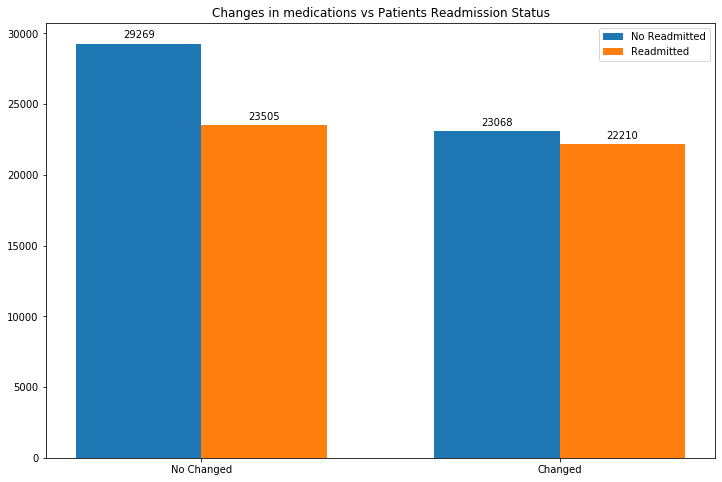

In [37]:
fig, ax = plt.subplots()

ind_change = np.arange(2)
width = 0.35  # the width of the bars
change_countNRA = diabeticDF_noReadmitted['change'].value_counts()
change_countRA = diabeticDF_readmitted['change'].value_counts()

change_plot1 = ax.bar(ind_change,change_countNRA, width, label = 'No Readmitted')
change_plot2 = ax.bar(ind_change+width,change_countRA, width, label = 'Readmitted')

ax.set_title('Changes in medications vs Patients Readmission Status')
ax.set_xticks(ind_change + width / 2)
ax.set_xticklabels(('No Changed', 'Changed'))

ax.legend()
ax.autoscale_view()

def autolabel3(change_plot):
    for changeplot in change_plot:
        h = changeplot.get_height()
        ax.text(changeplot.get_x()+changeplot.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel3(change_plot1)
autolabel3(change_plot2)

plt.show()

Del gráfico anterior se puede observar que un 55.5% de los pacientes que no se le cambió la medicación no reingresaron al hospital, mientras que el porcentaje de pacientes que se le cambió la medicación y no reingresaron al hospital es de un 50.9%. Por lo que, se observa un ligero favorecimiento si no se cambia la medicación, **fortaleciendo la hipótesis** que indica que *el cambio de medicación disminuye la probabilidad de que el paciente no reingrese al hospital*. Cabe destacar que, la cantidad de observaciones para cada uno de los dos casos es muy similiar, 52 774 observaciones de pacientes que no cambian la medicación y, 45 278 observaciones de pacientes que cambian de medicación.

##### Correlación

La matriz de correlación nos permite revisar la relación que existe entre dos o más caaracterísticas o variables. Cada correlación es un número entre uno negativo y uno positivo. Los números positivos implican asociaciones positivas, mientras que los números negativos implican asociaciones inversas.

A continuación, se procede a trabajar con los datos numéricos con el fin de observar las correlaciones entre los atributos

In [38]:
corrMat = diabeticDF.corr()
corrMat

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318632,0.191164,0.464212,-0.010913,-0.010508,0.072282,0.211225
num_lab_procedures,0.318632,1.000000,0.058710,0.267863,-0.008625,-0.002142,0.039198,0.150257
num_procedures,0.191164,0.058710,1.000000,0.382952,-0.026453,-0.038723,-0.067535,0.058973
num_medications,0.464212,0.267863,0.382952,1.000000,0.042652,0.012127,0.062905,0.241501
number_outpatient,-0.010913,-0.008625,-0.026453,0.042652,1.000000,0.091033,0.105979,0.091414
number_emergency,-0.010508,-0.002142,-0.038723,0.012127,0.091033,1.000000,0.267174,0.054616
number_inpatient,0.072282,0.039198,-0.067535,0.062905,0.105979,0.267174,1.000000,0.101244
number_diagnoses,0.211225,0.150257,0.058973,0.241501,0.091414,0.054616,0.101244,1.000000


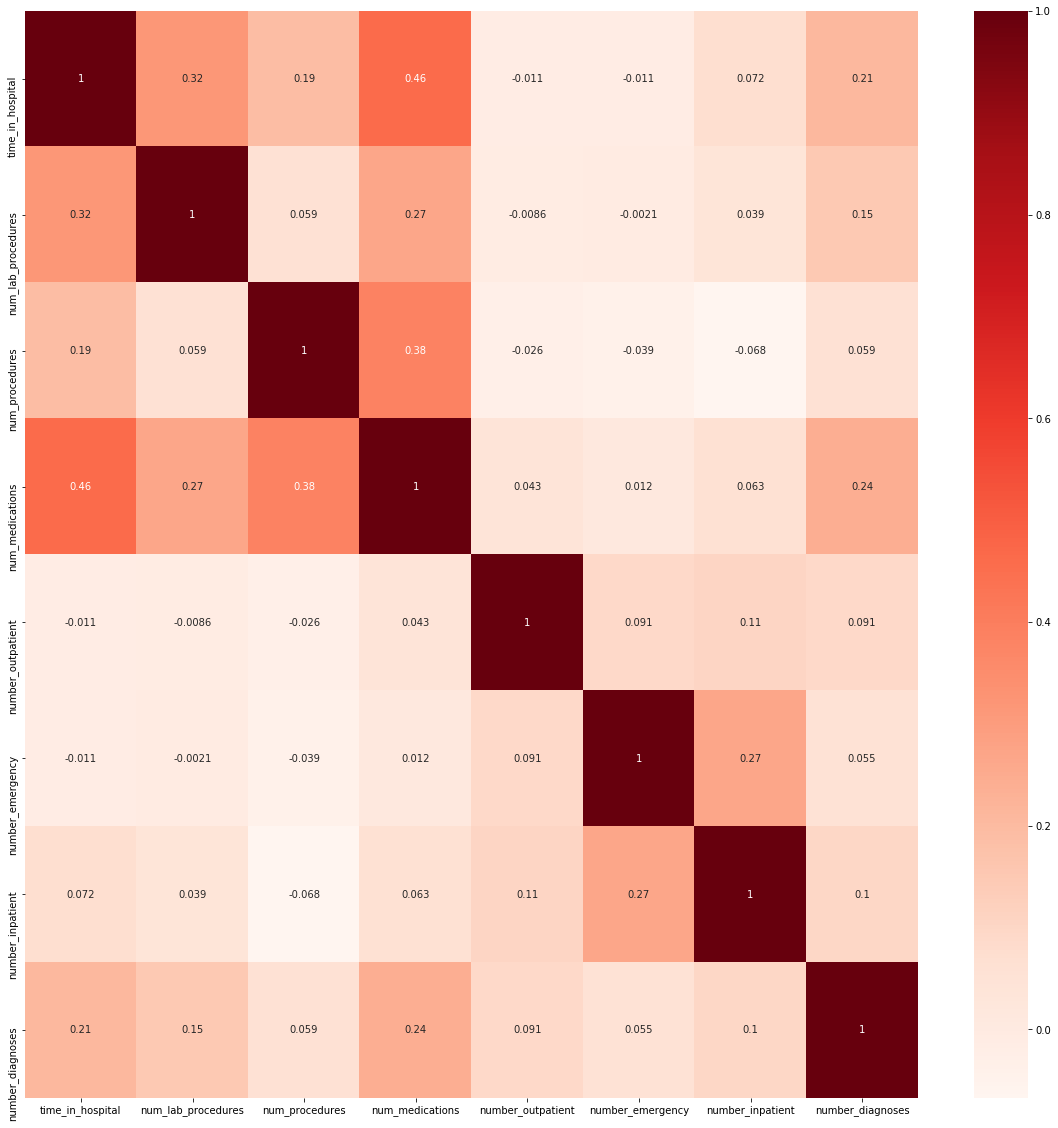

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(corrMat, annot=True, cmap=plt.cm.Reds)
plt.show()

No se observa una correlación alta entre las variables numéricas presentes en el conjunto de datos disponible.

##### Covarianza

La covarianza usualmente se utiliza para medir el grado lineal de cambio entre dos variables. Es decir; se puede usar para medir cómo los cambios en una variable se encuentran asociados a los cambios en una segunda variable. Esto es muy importante para estudiar el impacto que pueden tener varias características en las tasas predeterminadas.

A continuación, se procede a calcular la covarianza con las variables numéricas del conjunto de datos

In [40]:
covMat = diabeticDF.cov()
covMat

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,8.958467,18.798878,0.977531,11.266101,-0.041920,-0.029656,0.274981,1.158509
num_lab_procedures,18.798878,388.553363,1.977182,42.813262,-0.218182,-0.039809,0.982065,5.427476
num_procedures,0.977531,1.977182,2.918886,5.305102,-0.058001,-0.062379,-0.146654,0.184629
num_medications,11.266101,42.813262,5.305102,65.747700,0.443846,0.092716,0.648303,3.588359
number_outpatient,-0.041920,-0.218182,-0.058001,0.443846,1.647027,0.110158,0.172872,0.214981
number_emergency,-0.029656,-0.039809,-0.062379,0.092716,0.110158,0.889055,0.320194,0.094368
number_inpatient,0.274981,0.982065,-0.146654,0.648303,0.172872,0.320194,1.615505,0.235809
number_diagnoses,1.158509,5.427476,0.184629,3.588359,0.214981,0.094368,0.235809,3.357953


De la tabla anterior se puede observar que existe relación positiva en distintas variables por ejemplo, la cantidad de tiempo en el hospital tiene una relación directa con variables como el número de medicamentos y de procesos de laboratorio realizados, lo cual es esperado. De igual manera, hay una relación directa entre el número de procedimientos de laboratorio con el número de diagnósticos ingresados en el sistema.

#### 4. Construcción y Evaluación de Modelos

Una vez explorado los datos de forma adecuada, se continúa con el proceso de modelado. Se construyen modelos de clasificación con tres tipos de algoritmos distintos, mediante el uso del módulo de Sci-Kit Learn. Finalmente, se comparan los resultados de cada uno de ellos, con el fin de brindar la solución con mejor rendimiento.

Para los modelos a utilizar se modificaran los strings por categorías numéricas.

##### Modificando las categorías

Se procede a cambiar las categorías de la siguiente manera:

  - *race*. AfricanAmerican: 0, Asian: 1, Caucasian: 2, Hispanic: 3, Other: 4.
  - *gender*. Female: 0, Male: 1.
  - *age*. Child: 0, Young Adults: 1, Adults: 2, Middle-Aged Adults: 3, Older Adults: 4.
  - *max_glu_serum*. None: 0, Norm: 100, >200: 200, >300: 300.
  - *A1Cresult*. None: 0, Norm: 5, >7: 7, >8: 8.
  - *change*. No: 0, Ch: 1.
  - *diabetesMed*. No: 0, Yes: 1.
  - *readmitted*. NO: 0, YES: 1.
  - features de medicamentos. No: -2, Down: -1, Steady: 0, Up: 1.
  - diagnósticos. AfricanAmerican: 0, Asian: 1, Caucasian: 2, Hispanic: 3, Other: 4

In [41]:
#Replaceing values in features
diabeticDF.loc[:, 'race'].replace(['AfricanAmerican','Asian','Caucasian','Hispanic','Other'], ['0','1','2','3','4'], inplace=True)
diabeticDF.loc[:, 'gender'].replace(['Female','Male'], ['0','1'], inplace=True)
diabeticDF.loc[:, 'age'].replace(['Child','Young Adults','Adults','Middle-Aged Adults','Older Adults'], ['0','1','2','3','4'], inplace=True)
diabeticDF.loc[:, 'max_glu_serum'].replace(['None','Norm','>200','>300'], ['0','100','200','300'], inplace=True)
diabeticDF.loc[:, 'A1Cresult'].replace(['None','Norm','>7','>8'], ['0','5','7','8'], inplace=True)
diabeticDF.loc[:, 'change'].replace(['No','Ch'], ['0','1'], inplace=True)
diabeticDF.loc[:, 'diabetesMed'].replace(['No','Yes'], ['0','1'], inplace=True)
diabeticDF.loc[:, 'readmitted'].replace(['NO','YES'], ['0','1'], inplace=True)

#Dictionary for medications
dict_med = {'No': '-2', 'Down': '-1', 'Steady': '0', 'Up': '1'}
#Columns of medications
features_med = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
#Replacing values in medications features
for column_med in features_med:
    diabeticDF[column_med] = diabeticDF[column_med].replace(dict_med)

#Dictionary for diagnosis
dict_diag = {'Circulatory': '1', 'Other': '2', 'Respiratory': '3', 'Digestive': '4', 'Diabetes': '5', 'Injury': '6', 'Genitourinary': '7', 'Musculoskeletal': '8', 'Neoplams': '9'}
#Columns of diagnosis
features_diag = ['diag_1', 'diag_2', 'diag_3']
#Replacing values in diagnosis
for column_diag in features_diag:
    diabeticDF[column_diag] = diabeticDF[column_diag].replace(dict_diag)

C:\Users\msfallas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\msfallas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\msfallas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Revisando los cambios

In [42]:
diabeticDF.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,1,3,59,0,18,0,0,0,...,-2,1,-2,-2,-2,-2,-2,1,1,1
2,0,0,1,2,11,5,13,2,0,1,...,-2,-2,-2,-2,-2,-2,-2,0,1,0
3,2,1,2,2,44,1,16,0,0,0,...,-2,1,-2,-2,-2,-2,-2,1,1,0
4,2,1,3,1,51,0,8,0,0,0,...,-2,0,-2,-2,-2,-2,-2,1,1,0
5,2,1,3,3,31,6,16,0,0,0,...,-2,0,-2,-2,-2,-2,-2,0,1,1


In [43]:
diabeticDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98052 non-null  object
 1   gender                    98052 non-null  object
 2   age                       98052 non-null  object
 3   time_in_hospital          98052 non-null  int64 
 4   num_lab_procedures        98052 non-null  int64 
 5   num_procedures            98052 non-null  int64 
 6   num_medications           98052 non-null  int64 
 7   number_outpatient         98052 non-null  int64 
 8   number_emergency          98052 non-null  int64 
 9   number_inpatient          98052 non-null  int64 
 10  diag_1                    98052 non-null  object
 11  diag_2                    98052 non-null  object
 12  diag_3                    98052 non-null  object
 13  number_diagnoses          98052 non-null  int64 
 14  max_glu_serum        

##### Seleccionando los conjutos

A continuación, se procede a seleccionar las características y la variable dependiente.

In [44]:
#features
features_diabeticDF = diabeticDF.iloc[:,0:41]
print('Summary of feature sample')
features_diabeticDF.head()

Summary of feature sample


,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
1,2,0,1,3,59,0,18,0,0,0,...,-2,-2,1,-2,-2,-2,-2,-2,1,1
2,0,0,1,2,11,5,13,2,0,1,...,-2,-2,-2,-2,-2,-2,-2,-2,0,1
3,2,1,2,2,44,1,16,0,0,0,...,-2,-2,1,-2,-2,-2,-2,-2,1,1
4,2,1,3,1,51,0,8,0,0,0,...,-2,-2,0,-2,-2,-2,-2,-2,1,1
5,2,1,3,3,31,6,16,0,0,0,...,-2,-2,0,-2,-2,-2,-2,-2,0,1


In [45]:
#dependent variable
depVar_diabeticDF = diabeticDF['readmitted']
print('Summary of dependent variable')
depVar_diabeticDF.head()

Summary of dependent variable


1    1
2    0
3    0
4    0
5    1
Name: readmitted, dtype: object

Se puede realizar la validación cruzada mediante sklearn.cross_validation en los conjuntos de datos, utilizndo una división de 75/25 los datos:

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features_diabeticDF, depVar_diabeticDF, test_size = 0.25, random_state=0)
X_train.shape, X_test.shape

((73539, 41), (24513, 41))

##### Seleccionando los conjutos

Inicialmente, se establecen variables que se utilizarán para definir cada modelo, como se muestra a continuación:

In [47]:
#Models
modelKNN = KNeighborsClassifier(n_neighbors=10, weights='uniform')
modelSVM = SVC(kernel='rbf', gamma='scale')
modelRF = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=10, criterion='gini')

A continuación, se transfiere los datos de entrenamiento a todos los modelos que se construirán utilizando las variables de modelo que se crearon anteriormente.

In [48]:
#Random Forest Classifier
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=10, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
#K-Nearest Neighbors (KNN)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [50]:
#Support Vector Machine Classifier (SVM)
modelSVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Seleccionando el Modelo Correcto

En la mayoría de los casos es necesario la construcción de más de un modelo para encontrar el más apropiado para el trabajo. Sci-Kit Learn tiene una función que 'puntuará' la adecuación de cada modelo según el algoritmo utilizado para construirlo; los modelos con los puntajes más altos deben usarse para hacer predicciones. La métrica que usaremos para verificar el uso apropiado del modelo se llama cross_val_score.

Para su obtención, se pasa cada modelo entrenado los conjuntos de entrenamiento a la función para obtener el puntaje de entrenamiento:

In [51]:
#Random Forest model
print(cross_val_score(modelRF, X_train, y_train)) 

[0.61911885 0.61184389 0.61694316 0.61089203 0.61467328]


In [52]:
#KNN
print(cross_val_score(modelKNN, X_train, y_train)) 

[0.56642643 0.56418276 0.56241501 0.56017134 0.56551302]


In [53]:
#Support Vector Regression
print(cross_val_score(modelSVM, X_train, y_train)) 

[0.60184933 0.59838183 0.60470492 0.59709002 0.60019039]


Seguidamente, se procede a puntuar cada uno de los modelos creados

In [54]:
modelRF.score(X_train,y_train)

0.9999864017732087

In [55]:
modelKNN.score(X_train,y_train)

0.6556521029657733

In [56]:
modelSVM.score(X_train,y_train)

0.6010688206257904

##### Haciendo las Predicciones y Evaluando los Resultados

A continuación, se realizan las predicciones utilizando los tres modelos creados anteriormente.

In [57]:
predictionsRF = modelRF.predict(X_test)
predictionsKNN = modelKNN.predict(X_test)
predictionsSVM = modelSVM.predict(X_test)

Al estar resolviendo un problema de clasificación, se toman como parámetros de medición, para seleccionar el modelo con mejor rendimiento, la matriz de confusión, el reporte de clasificación, la exactitud y el valor de kappa.

A continuación se muestran los resultados de cada modelo:

 - Random Forest:

In [58]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsRF))
print("Classification Report")
print(classification_report(y_test, predictionsRF))
print("Accuracy")
print(accuracy_score(y_test, predictionsRF))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsRF)) 

Confusion Matrix
[[9285 3687]
 [5682 5859]]
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.72      0.66     12972
           1       0.61      0.51      0.56     11541

    accuracy                           0.62     24513
   macro avg       0.62      0.61      0.61     24513
weighted avg       0.62      0.62      0.61     24513

Accuracy
0.6177946395789989
Kappa
0.22559167065710917


 - K-Nearest Neighbor:

In [59]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsKNN))
print("Classification Report")
print(classification_report(y_test, predictionsKNN))
print("Accuracy")
print(accuracy_score(y_test, predictionsKNN))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsKNN)) 

Confusion Matrix
[[9845 3127]
 [7637 3904]]
Classification Report
              precision    recall  f1-score   support

           0       0.56      0.76      0.65     12972
           1       0.56      0.34      0.42     11541

    accuracy                           0.56     24513
   macro avg       0.56      0.55      0.53     24513
weighted avg       0.56      0.56      0.54     24513

Accuracy
0.5608860604577163
Kappa
0.09935614553139749


 - Support Vector Machine:

In [60]:
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsSVM))
print("Classification Report")
print(classification_report(y_test, predictionsSVM))
print("Accuracy")
print(accuracy_score(y_test, predictionsSVM))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsSVM)) 

Confusion Matrix
[[11633  1339]
 [ 8534  3007]]
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.90      0.70     12972
           1       0.69      0.26      0.38     11541

    accuracy                           0.60     24513
   macro avg       0.63      0.58      0.54     24513
weighted avg       0.63      0.60      0.55     24513

Accuracy
0.5972341206706645
Kappa
0.1629296272844969


Observando los resultados anteriores, el modelo con mejor rendimiento corresponde al modelo que utliza el algoritmo de *Random Forest Classifier*, ya que posee un 61.2% de exactitud y el valor de kappa más alto.

A continuación, se observa la importancia que se le da a cada una de las variables.

In [61]:
importancesRF = modelRF.feature_importances_
indices = np.argsort(importancesRF)[::-1]
std = np.std([tree.feature_importances_ for tree in modelRF.estimators_],
             axis=0)

In [63]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], features_diabeticDF.columns[indices[f]], importancesRF[indices[f]]))

Feature ranking:
1. feature 4: num_lab_procedures (0.140556)
2. feature 6: num_medications (0.119614)
3. feature 3: time_in_hospital (0.083281)
4. feature 10: diag_1 (0.069359)
5. feature 12: diag_3 (0.067728)
6. feature 11: diag_2 (0.066355)
7. feature 9: number_inpatient (0.055864)
8. feature 13: number_diagnoses (0.053160)
9. feature 5: num_procedures (0.052350)
10. feature 33: insulin (0.030321)
11. feature 0: race (0.028270)
12. feature 2: age (0.027523)
13. feature 1: gender (0.025677)
14. feature 15: A1Cresult (0.023297)
15. feature 7: number_outpatient (0.022645)
16. feature 8: number_emergency (0.018353)
17. feature 16: metformin (0.015502)
18. feature 22: glipizide (0.014625)
19. feature 23: glyburide (0.014130)
20. feature 39: change (0.013050)
21. feature 14: max_glu_serum (0.010935)
22. feature 25: pioglitazone (0.010875)
23. feature 26: rosiglitazone (0.009690)
24. feature 20: glimepiride (0.009228)
25. feature 40: diabetesMed (0.007590)
26. feature 17: repaglinide (0.003